In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/telcom_data.xlsx')
df.shape

(150001, 55)

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].fillna(df[col].mode()[0])
  else:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum()

,0
Bearer Id,0
Start,0
Start ms,0
End,0
End ms,0
Dur. (ms),0
IMSI,0
MSISDN/Number,0
IMEI,0
Last Location Name,0


In [ ]:
for col in df.columns:
  if df[col].dtype == 'Number':
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [ ]:
# Calculating total session duration
df['Total_Duration'] = df['Dur. (ms)']+df['Dur. (ms).1']

In [ ]:
# Calculating total traffic
df['Total_Traffic'] = df['Total DL (Bytes)']+df['Total UL (Bytes)']

**Aggregating our customer information**

In [ ]:
user_engagement = df.groupby('MSISDN/Number').agg(
    Session_Frequency=('Bearer Id', 'count'),
    Total_Duration=('Total_Duration', 'sum'),
    Total_Traffic=('Total_Traffic', 'sum')

)

user_engagement.head()

,Session_Frequency,Total_Duration,Total_Traffic
MSISDN/Number,,,
3.360100e+10,1,116836860.0,8.786906e+08
3.360100e+10,1,181412193.0,1.568596e+08
3.360100e+10,1,135104343.0,5.959665e+08
3.360101e+10,1,49927902.0,4.223207e+08
3.360101e+10,2,37141557.0,1.457411e+09


In [ ]:
user_engagement.corr()

,Session_Frequency,Total_Duration,Total_Traffic
Session_Frequency,1.000000,0.841128,0.985401
Total_Duration,0.841128,1.000000,0.828619
Total_Traffic,0.985401,0.828619,1.000000


In [ ]:
user_engagement.to_csv('user_engagement.csv', index=False)

<Axes: >

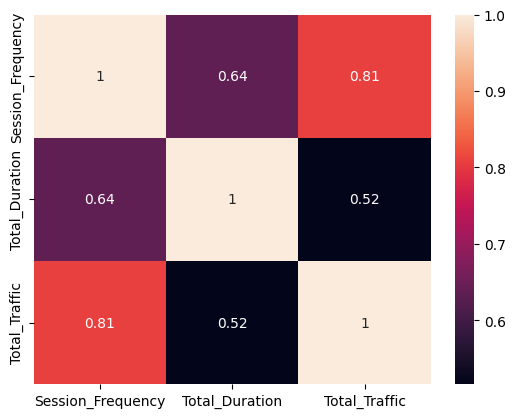

In [ ]:
sns.heatmap(user_engagement.corr(), annot=True)


**Interpretation**

**Session Frequency vs. Total Duration:**

Correlation Coefficient: 0.841128

Interpretation: There is a strong positive correlation between session frequency and total duration. This means that as the frequency of sessions increases, the total duration of sessions also tends to increase. Users who have more frequent sessions also tend to spend more time per session overall.

**Session Frequency vs. Total Traffic:**

Correlation Coefficient: 0.985401

Interpretation: There is an extremely strong positive correlation between session frequency and total traffic. This indicates that as the frequency of sessions increases, the total traffic also increases significantly. Users with more frequent sessions tend to generate more total traffic, suggesting that session frequency is a strong predictor of total traffic.

**Total Duration vs. Total Traffic:**

Correlation Coefficient: 0.828619

Interpretation: There is a strong positive correlation between total duration and total traffic. This means that as the total duration of sessions increases, the total traffic also tends to increase. Users who spend more time per session also tend to generate more total traffic.

**Summary**

In summary, the strong positive correlations between these variables suggest that they are closely related. Increasing session frequency and total duration can significantly impact total traffic, with session frequency being the most influential factor.

**Report the top 10 customers per engagement metric**


In [ ]:
top_10_session_frequency = user_engagement.sort_values(by='Session_Frequency', ascending=False).head(10)
print(top_10_session_frequency[['Session_Frequency']])

               Session_Frequency
MSISDN/Number                   
4.188282e+10                1066
3.362632e+10                  18
3.362578e+10                  17
3.361489e+10                  17
3.365973e+10                  16
3.367588e+10                  15
3.376054e+10                  15
3.366716e+10                  13
3.360452e+10                  12
3.362708e+10                  12


**Analysis**

High Variation:
The highest session frequency in our data is 1066, which is significantly higher than the next highest frequency of 18.
This indicates a large discrepancy between the top frequency and the other frequencies listed. The top entry stands out as an outlier in this dataset.

Frequency Distribution:
Most of the MSISDN/Numbers have session frequencies that are much lower than the highest value. For example, frequencies range from 12 to 1066. This distribution suggests that a few users (or numbers) are responsible for a disproportionately high number of sessions

In [ ]:
top_10_total_traffic = user_engagement.sort_values(by= 'Total_Traffic' , ascending=False).head(10)
print(top_10_total_traffic[['Total_Traffic']])

               Total_Traffic
MSISDN/Number               
4.188282e+10    5.317447e+11
3.361489e+10    8.846226e+09
3.376054e+10    8.514774e+09
3.362578e+10    8.499621e+09
3.362632e+10    7.971167e+09
3.367588e+10    7.891111e+09
3.365973e+10    7.705863e+09
3.366646e+10    7.308501e+09
3.376041e+10    7.132371e+09
3.366471e+10    6.872018e+09


**Analysis**

High Variation: MSISDN/Numbber 4.188282e+10 has the highest total traffic of 5.317447e+11, which is much higher compared to the other entries.
The other values range from 6.872018e+09 to 8.846226e+09, showing a significant drop from the top value.

Traffic Distribution: The total traffic values vary considerably. The highest value is roughly 60 times greater than the lowest value among the top 10. This indicates a high degree of variability in traffic consumption among users.

In [ ]:
top_10_total_duration = user_engagement.sort_values(by= 'Total_Duration' , ascending=False).head(10)
print(top_10_total_duration[['Total_Duration']])

               Total_Duration
MSISDN/Number                
4.188282e+10     7.262410e+10
3.362578e+10     1.857232e+10
3.361489e+10     9.976873e+09
3.376054e+10     9.288721e+09
3.362632e+10     8.800729e+09
3.366716e+10     8.753667e+09
3.366284e+10     6.620889e+09
3.366469e+10     6.295025e+09
3.360313e+10     6.294055e+09
3.366746e+10     5.655535e+09


**Analysis**

High Engagement:The top user, 4.188282e+10, has a total duration of 7.262410e+10, which is significantly higher than the other users. This indicates that this user has the highest engagement or usage time among the top 10.
The remaining users have lower total durations, but they still represent the top 10 highest in this metric.

Data Range:There is a substantial range between the highest total duration (7.262410e+10) and the lowest in the top 10 (5.655535e+09). This wide range suggests that while the top 10 users are highly engaged, the levels of engagement vary significantly.

**Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_engagement)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement['Cluster'] = kmeans.fit_predict(scaled_data)

In [ ]:
user_engagement.head()

,Session_Frequency,Total_Duration,Total_Traffic,Cluster
MSISDN/Number,,,,
3.360100e+10,1,116836860.0,8.786906e+08,0
3.360100e+10,1,181412193.0,1.568596e+08,0
3.360100e+10,1,135104343.0,5.959665e+08,0
3.360101e+10,1,49927902.0,4.223207e+08,0
3.360101e+10,2,37141557.0,1.457411e+09,0


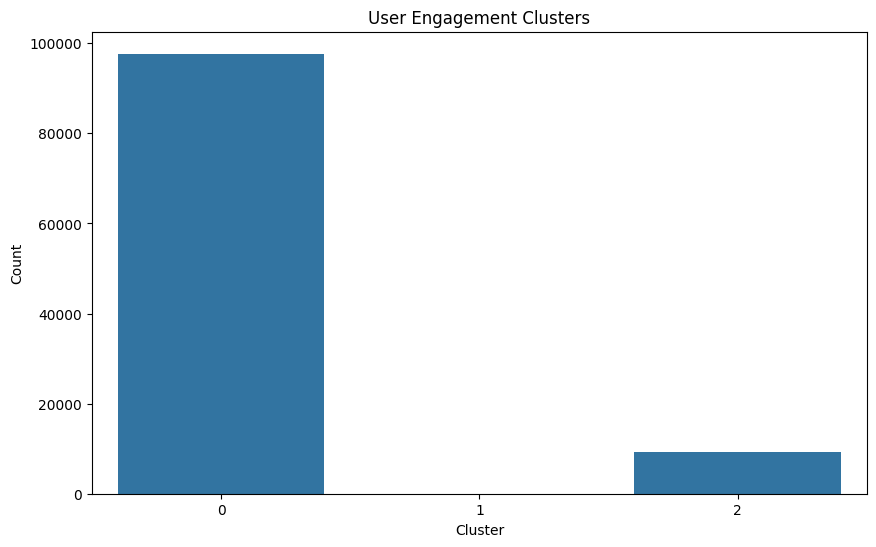

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=user_engagement)
plt.title('User Engagement Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

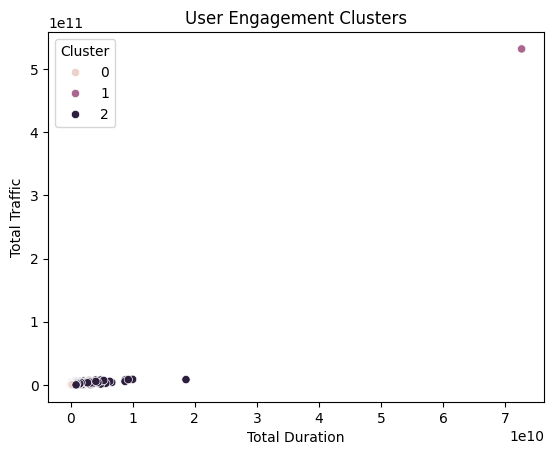

In [ ]:
sns.scatterplot(x='Total_Duration', y='Total_Traffic', hue='Cluster', data=user_engagement)
plt.title('User Engagement Clusters')
plt.xlabel('Total Duration')
plt.ylabel('Total Traffic')
plt.show()

In [ ]:
user_engagement['Cluster'].value_counts()

,count
Cluster,
0,97672
2,9184
1,1


**Understanding Cluster Sizes**

Cluster 0 contains the majority of our customers (97,672), indicating it is the most populous cluster.

Cluster 2 has a smaller group of 9,184 customers.

Cluster 1 contains only a single customer, which is unusual and might be indicative of a few scenarios.

**Cluster 0 (97,672 customers):**

This large cluster likely represents a broad range of average engagement metrics. Customers in this cluster could be categorized as having moderate or high engagement levels.
This cluster might include typical users with average or above-average metrics in terms of sessions frequency, session duration, and total session traffic.

**Cluster 2 (9,184 customers):**

This cluster is smaller but still significant. It might represent a distinct segment with different engagement characteristics compared to Cluster 0.
Customers in this cluster could have specific traits like high frequency of sessions but lower session duration, or vice versa

**Cluster 1 (1 customer):**

Having only one customer in this cluster is quite unusual and could suggest a few possibilities:
Outlier: This single customer might be an outlier with very unique engagement metrics compared to the rest. This customer could have extremely high or low values in one or more metrics.
Special Case: This customer could represent a rare but specific type of engagement profile. Further analysis of this customer’s metrics could provide insights into why they are so distinct from others.

**Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings**

In [ ]:
#Group by cluster and calculate metrics
metrics = user_engagement.groupby('Cluster').agg(
    min_duration = ('Total_Duration', 'min'),
    max_duration = ('Total_Duration', 'max'),
    average_duration = ('Total_Duration', 'mean'),
    total_duration = ('Total_Duration', 'sum')
).reset_index()

print(metrics)

   Cluster  min_duration  max_duration  average_duration  total_duration
0        0  7.150130e+06  4.288960e+08      1.132227e+08    1.105868e+13
1        1  7.262410e+10  7.262410e+10      7.262410e+10    7.262410e+10
2        2  9.006607e+07  1.857232e+10      4.982420e+08    4.575854e+12


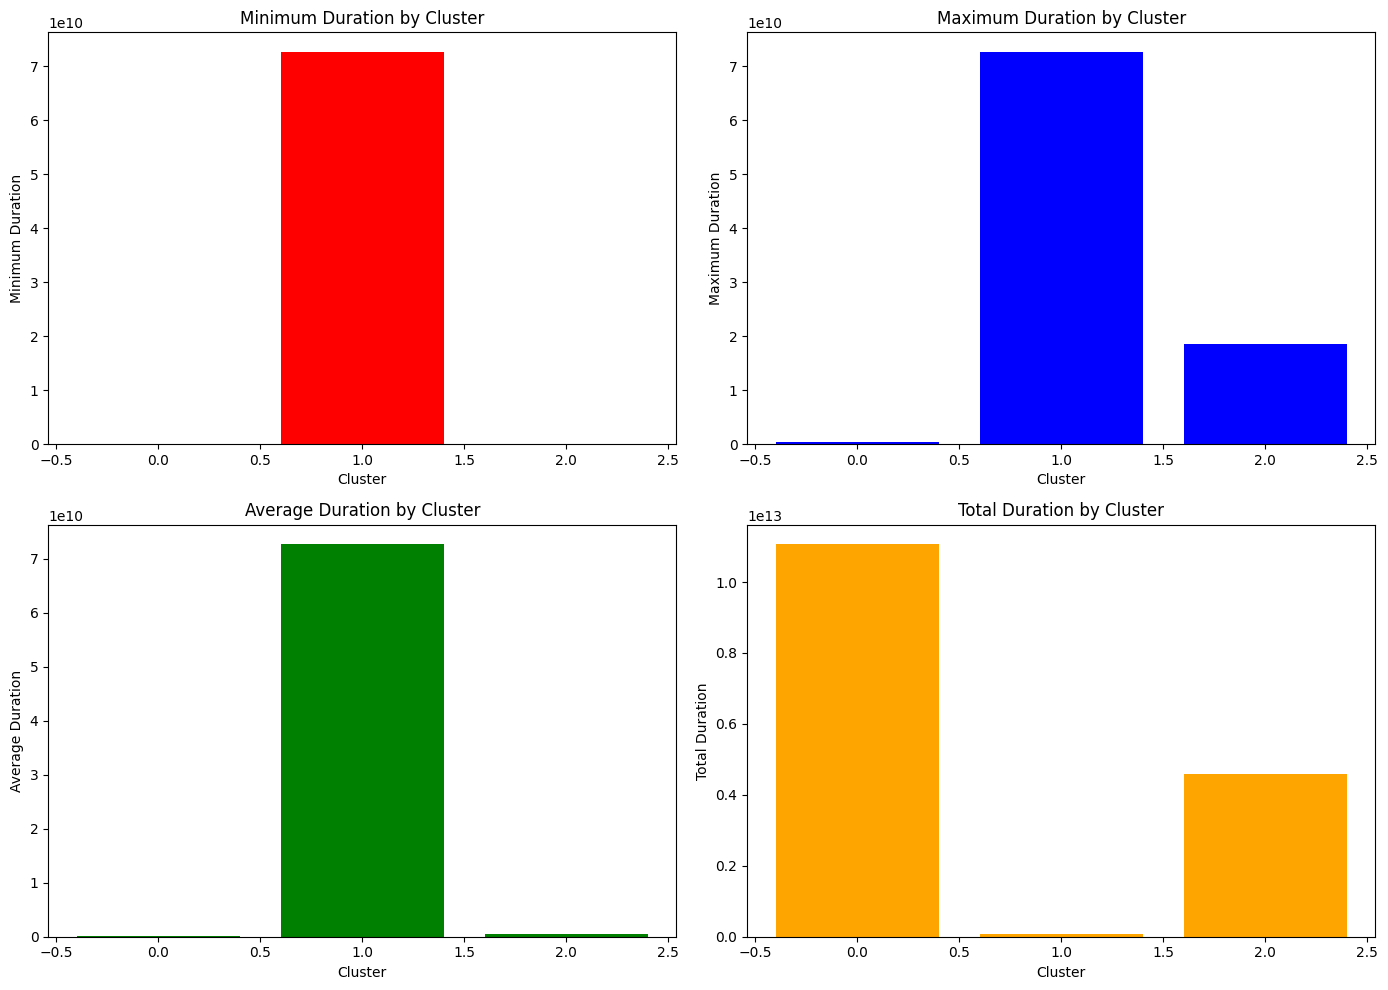

In [ ]:
#Plotting
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

#Plot minimum durations
ax[0,0].bar(metrics['Cluster'], metrics['min_duration'],color = 'red')
ax[0,0].set_title('Minimum Duration by Cluster')
ax[0,0].set_xlabel('Cluster')
ax[0,0].set_ylabel('Minimum Duration')

#Plot maximum durations
ax[0,1].bar(metrics['Cluster'] , metrics['max_duration'],color = 'blue')
ax[0,1].set_title('Maximum Duration by Cluster')
ax[0,1].set_xlabel('Cluster')
ax[0,1].set_ylabel('Maximum Duration')

#Plot average durations
ax[1,0].bar(metrics['Cluster'] , metrics['average_duration'],color = 'green')
ax[1,0].set_title('Average Duration by Cluster')
ax[1,0].set_xlabel('Cluster')
ax[1,0].set_ylabel('Average Duration')

#Plot total durations
ax[1,1].bar(metrics['Cluster'] , metrics['total_duration'],color = 'orange')
ax[1,1].set_title('Total Duration by Cluster')
ax[1,1].set_xlabel('Cluster')
ax[1,1].set_ylabel('Total Duration')

plt.tight_layout()
plt.show()


**Interpretation**

**Cluster 0:**

Minimum Duration: 7,150,130
Maximum Duration: 428,896,000
Average Duration: 113,222,700
Total Duration: 11,058,680,000,000
Interpretation: Cluster 0 shows a wide range of engagement durations, from relatively low to very high. The average duration is substantial, and the total duration is very high, indicating that this cluster has a large number of users with significant overall engagement, though there's considerable variation among them

**Cluster 1:**

Minimum Duration: 72,624,100,000
Maximum Duration: 72,624,100,000
Average Duration: 72,624,100,000
Total Duration: 72,624,100,000
Interpretation: Cluster 1 has uniform engagement, with all users having the same total duration. This suggests that this cluster consists of a single user or a group of users with identical engagement metrics. This cluster represents a highly specialized or unique case with a very high total duration.

**Cluster 2:**

Minimum Duration: 90,066,070
Maximum Duration: 18,572,320,000
Average Duration: 498,242,000
Total Duration: 4,575,854,000,000
Interpretation: Cluster 2 has a broad range of engagement durations, with a lower minimum but a very high maximum value. The average duration is substantial, indicating significant engagement, though the total duration is less than that of Cluster 0. This cluster includes users with high engagement levels, but the distribution is less uniform than in Cluster 1


In [ ]:
#Group by cluster and calculate metrics for total duration
dur_metrics = user_engagement.groupby('Cluster').agg(
    min_traffic = ('Total_Traffic', 'min'),
    max_traffic = ('Total_Traffic', 'max'),
    average_traffic = ('Total_Traffic', 'mean'),
    total_traffic = ('Total_Traffic', 'sum')
).reset_index()

print(dur_metrics)

   Cluster   min_traffic   max_traffic  average_traffic  total_traffic
0        0  3.324901e+07  2.762548e+09     6.020705e+08   5.880543e+13
1        1  5.317447e+11  5.317447e+11     5.317447e+11   5.317447e+11
2        2  5.714004e+07  8.846226e+09     1.636325e+09   1.502801e+13


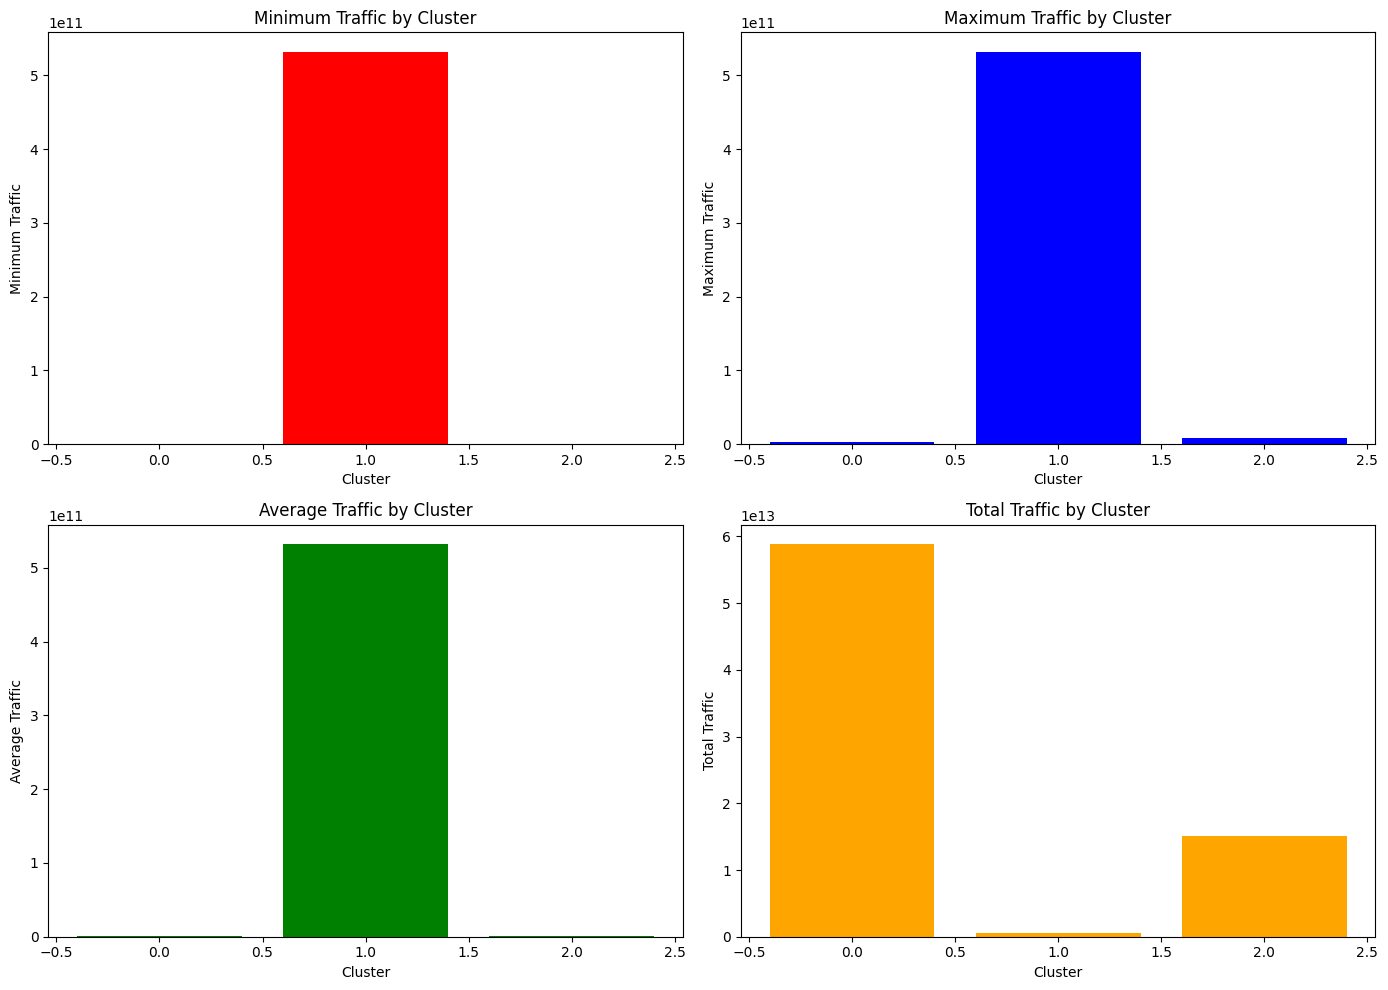

In [ ]:
#Plotting
fig , ax = plt.subplots(2,2,figsize=(14,10))

#Plot minimum durations
ax[0,0].bar(dur_metrics['Cluster'],dur_metrics['min_traffic'],color = 'red')
ax[0,0].set_title('Minimum Traffic by Cluster')
ax[0,0].set_xlabel('Cluster')
ax[0,0].set_ylabel('Minimum Traffic')

#Plot maximum duration
ax[0,1].bar(dur_metrics['Cluster'],dur_metrics['max_traffic'], color= 'blue' )
ax[0,1].set_title('Maximum Traffic by Cluster')
ax[0,1].set_xlabel('Cluster')
ax[0,1].set_ylabel('Maximum Traffic')

#Plot average duration
ax[1,0].bar(dur_metrics['Cluster'] , dur_metrics['average_traffic'] ,color='green')
ax[1,0].set_title('Average Traffic by Cluster')
ax[1,0].set_xlabel('Cluster')
ax[1,0].set_ylabel('Average Traffic')

#Plot total duration
ax[1,1].bar(dur_metrics['Cluster'] , dur_metrics['total_traffic'] ,color='orange')
ax[1,1].set_title('Total Traffic by Cluster')
ax[1,1].set_xlabel('Cluster')
ax[1,1].set_ylabel('Total Traffic')

plt.tight_layout()
plt.show()

**Interpretation**

**Cluster 0**
Minimum Traffic: 33,249,010
Maximum Traffic: 2,762,548,000
Average Traffic: 602,070,500
Total Traffic: 58,805,430,000,000 displays a wide range of traffic values, with a minimum traffic much lower than the maximum. The average traffic is substantial, indicating a high overall usage. The total traffic is extremely high, suggesting that Cluster 0 encompasses a large volume of traffic across many users

**Cluster 1**
Minimum Traffic: 531,744,700,000
Maximum Traffic: 531,744,700,000
Average Traffic: 531,744,700,000
Total Traffic: 531,744,700,000 shows uniform traffic metrics across all users, with all values being identical. This suggests that this cluster consists of users with the same level of traffic, which might represent a special case or anomaly. The traffic is very high, indicating that users in this cluster consume a substantial amount of data.

**Cluster2**
Minimum Traffic: 57,140,040
Maximum Traffic: 8,846,226,000
Average Traffic: 1,636,325,000
Total Traffic: 15,028,010,000,000 has a broad range of traffic values, similar to Cluster 0 but with a lower minimum and higher average traffic. The total traffic is significant, though less than Cluster 0. This indicates that Cluster 2 also represents a large volume of data usage but with a more diverse range of user traffic.


**Aggregate user total traffic per application and derive the top 10 most engaged users per application**

In [ ]:
#On the basis of our requirements choosing only necessary columns
cleaned_data = ['MSISDN/Number' , 'Social Media DL (Bytes)' , 'Social Media UL (Bytes)' ,
              'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
              'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
              'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
              'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']
agg_app = df[cleaned_data]

agg_app.head()

,MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,3.366496e+10,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0
1,3.368185e+10,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0
2,3.376063e+10,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0
3,3.375034e+10,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0
4,3.369980e+10,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0


In [ ]:
#Calculating Total traffic for each application

agg_app['Total_Social_Media_Traffic'] = agg_app['Social Media DL (Bytes)'] + agg_app['Social Media UL (Bytes)']
agg_app['Total_Google_Traffic'] = agg_app['Google DL (Bytes)'] + agg_app['Google UL (Bytes)']
agg_app['Total_Email_Traffic'] = agg_app['Email DL (Bytes)'] + agg_app['Email UL (Bytes)']
agg_app['Total_Youtube_Traffic'] = agg_app['Youtube DL (Bytes)'] + agg_app['Youtube UL (Bytes)']
agg_app['Total_Netflix_Traffic'] = agg_app['Netflix DL (Bytes)'] + agg_app['Netflix UL (Bytes)']
agg_app['Total_Gaming_Traffic'] = agg_app['Gaming DL (Bytes)'] + agg_app['Gaming UL (Bytes)']
agg_app['Total_Other_Traffic'] = agg_app['Other DL (Bytes)'] + agg_app['Other UL (Bytes)']

#Aggregating user total traffic application wise
agg_app_traffic = agg_app.groupby('MSISDN/Number').agg(
    Total_Social_Media_Traffic = ('Total_Social_Media_Traffic' ,sum),
    Total_Google_Traffic = ('Total_Google_Traffic' ,sum),
    Total_Email_Traffic = ('Total_Email_Traffic' ,sum),
    Total_Youtube_Traffic = ('Total_Youtube_Traffic' ,sum),
    Total_Netflix_Traffic = ('Total_Netflix_Traffic' ,sum),
    Total_Gaming_Traffic = ('Total_Gaming_Traffic' ,sum),
    Total_Other_Traffic = ('Total_Other_Traffic' ,sum)
).reset_index()

#Printing head of the data
agg_app_traffic.head()

,MSISDN/Number,Total_Social_Media_Traffic,Total_Google_Traffic,Total_Email_Traffic,Total_Youtube_Traffic,Total_Netflix_Traffic,Total_Gaming_Traffic,Total_Other_Traffic
0,3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [ ]:
#Top 10 most engaged user by each application

#Top 10 most engaged user by Social Media
top_10_social_media_user = agg_app_traffic.sort_values(by='Total_Social_Media_Traffic', ascending=False).head(10)
print(top_10_social_media_user[['Total_Social_Media_Traffic']])

#Top 10 most engaged user by Google
top_10_google_user = agg_app_traffic.sort_values(by='Total_Google_Traffic', ascending=False).head(10)
print(top_10_google_user[['Total_Google_Traffic']])

#Top 10 most engaged user by Email
top_10_email_user = agg_app_traffic.sort_values(by='Total_Email_Traffic', ascending=False).head(10)
print(top_10_email_user[['Total_Email_Traffic']])

#Top 10 most engaged user by YouTube
top_10_youtube_user = agg_app_traffic.sort_values(by='Total_Youtube_Traffic', ascending=False).head(10)
print(top_10_youtube_user[['Total_Youtube_Traffic']])

#Top 10 most engaged user by Netflix
top_10_netflix_user = agg_app_traffic.sort_values(by='Total_Netflix_Traffic', ascending=False).head(10)
print(top_10_netflix_user[['Total_Netflix_Traffic']])

#Top 10 most engaged user by Gaming
top_10_gaming_user = agg_app_traffic.sort_values(by='Total_Gaming_Traffic', ascending=False).head(10)
print(top_10_gaming_user[['Total_Gaming_Traffic']])

#Top 10 most engaged user by Other
top_10_other_user = agg_app_traffic.sort_values(by='Total_Other_Traffic', ascending=False).head(10)
print(top_10_other_user[['Total_Other_Traffic']])



        Total_Social_Media_Traffic
106853                1.973817e+09
13526                 4.337478e+07
92923                 3.978319e+07
37052                 3.541236e+07
6437                  2.829454e+07
13180                 2.713550e+07
65118                 2.424785e+07
106137                2.397492e+07
70960                 2.380083e+07
666                   2.307782e+07
        Total_Google_Traffic
106853          8.248577e+09
13526           1.521919e+08
13180           1.423079e+08
6437            1.279738e+08
92923           1.232231e+08
37052           1.165163e+08
106137          1.102545e+08
76363           1.098605e+08
65118           1.050327e+08
94654           9.708999e+07
        Total_Email_Traffic
106853         2.399880e+09
13526          4.241878e+07
6437           4.078863e+07
13180          4.063397e+07
106137         3.631012e+07
37052          3.599979e+07
92923          3.369377e+07
76363          3.151442e+07
60087          3.041788e+07
65118          3

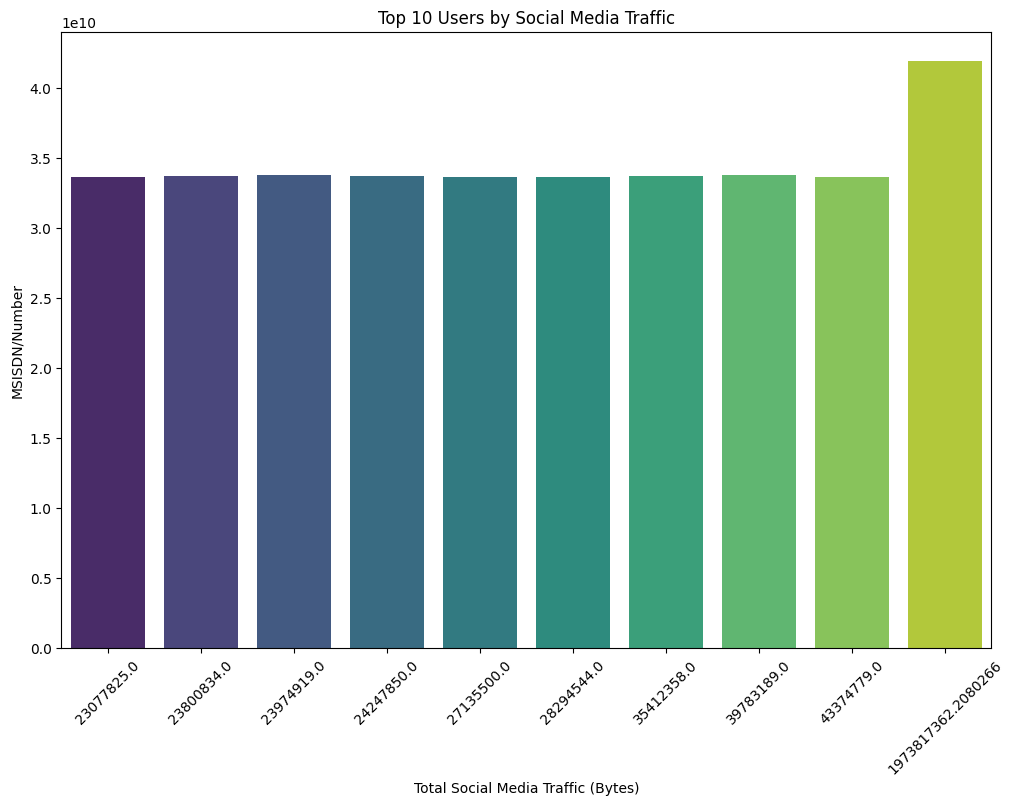

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot( y='MSISDN/Number',x='Total_Social_Media_Traffic', data=top_10_social_media_user, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Users by Social Media Traffic')
plt.xlabel('Total Social Media Traffic (Bytes)')
plt.ylabel('MSISDN/Number')
plt.show()

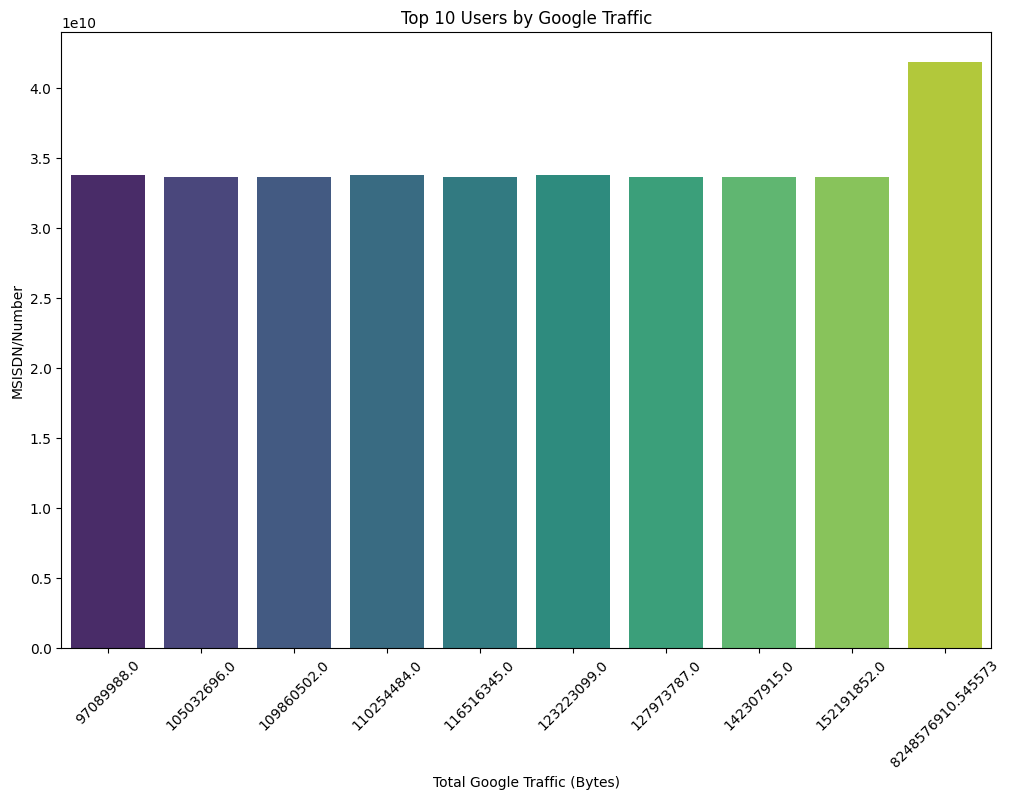

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot( x='Total_Google_Traffic',y='MSISDN/Number', data=top_10_google_user, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Users by Google Traffic')
plt.xlabel('Total Google Traffic (Bytes)')
plt.ylabel('MSISDN/Number')
plt.show()

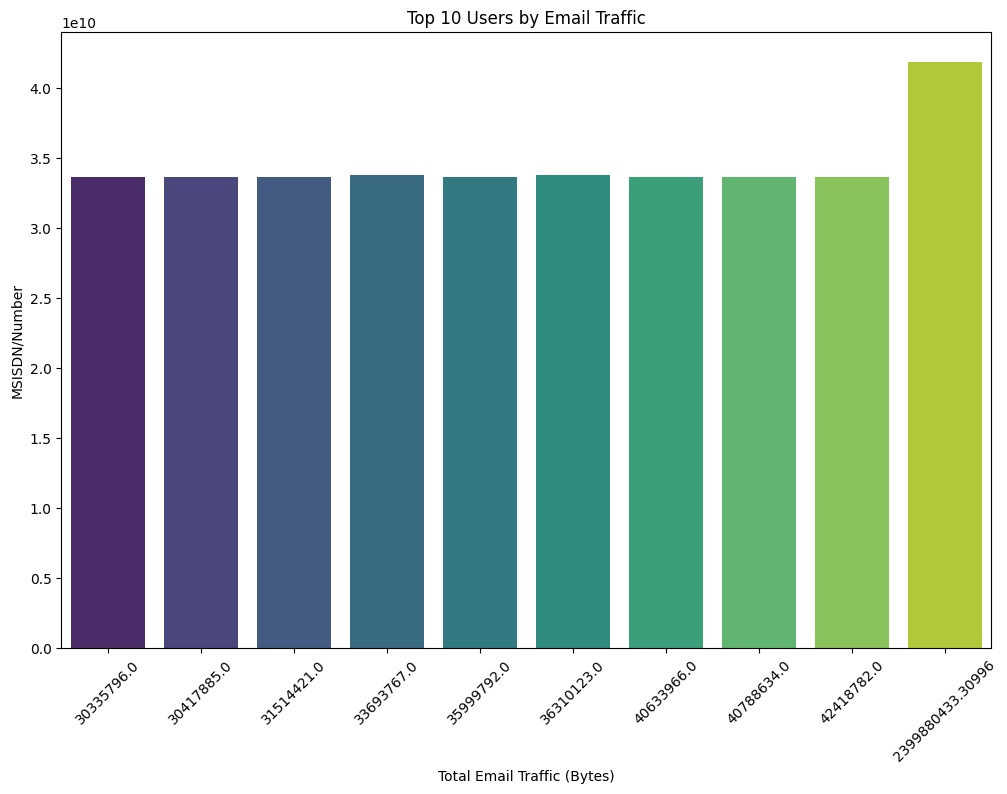

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot( x='Total_Email_Traffic',y='MSISDN/Number', data=top_10_email_user, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Users by Email Traffic')
plt.xlabel('Total Email Traffic (Bytes)')
plt.ylabel('MSISDN/Number')
plt.show()

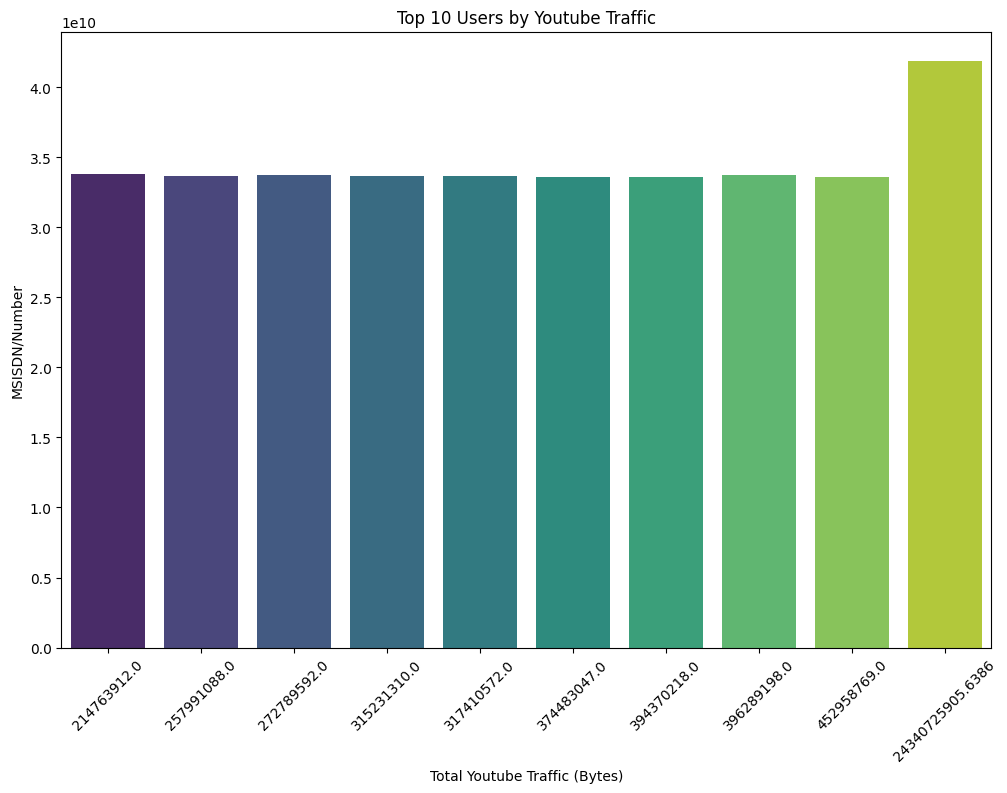

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot( x='Total_Youtube_Traffic',y='MSISDN/Number', data=top_10_google_user, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Users by Youtube Traffic')
plt.xlabel('Total Youtube Traffic (Bytes)')
plt.ylabel('MSISDN/Number')
plt.show()

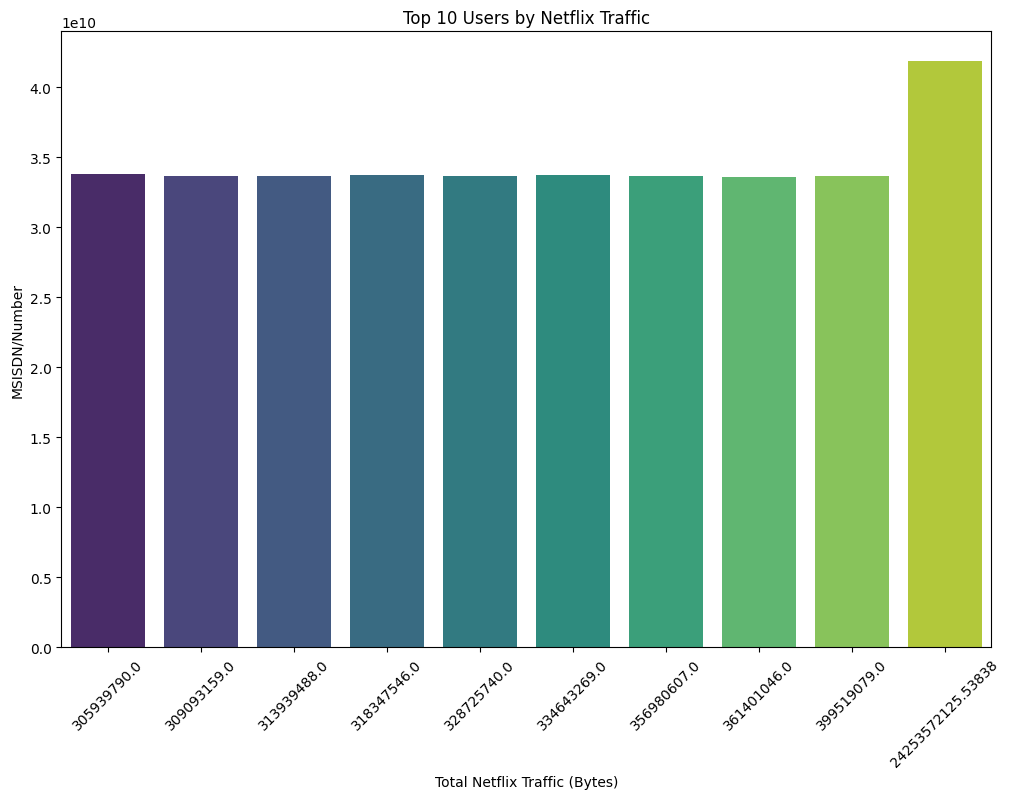

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot( x='Total_Netflix_Traffic',y='MSISDN/Number', data=top_10_netflix_user, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Users by Netflix Traffic')
plt.xlabel('Total Netflix Traffic (Bytes)')
plt.ylabel('MSISDN/Number')
plt.show()

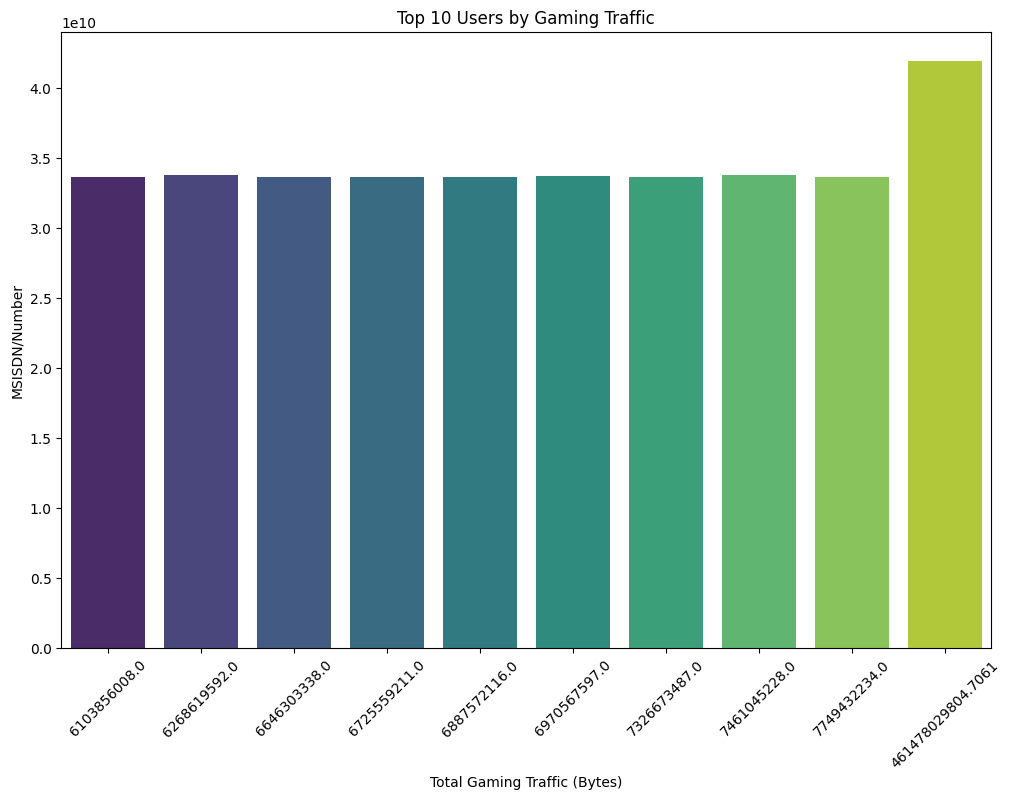

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot( x='Total_Gaming_Traffic',y='MSISDN/Number', data=top_10_gaming_user, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Users by Gaming Traffic')
plt.xlabel('Total Gaming Traffic (Bytes)')
plt.ylabel('MSISDN/Number')
plt.show()

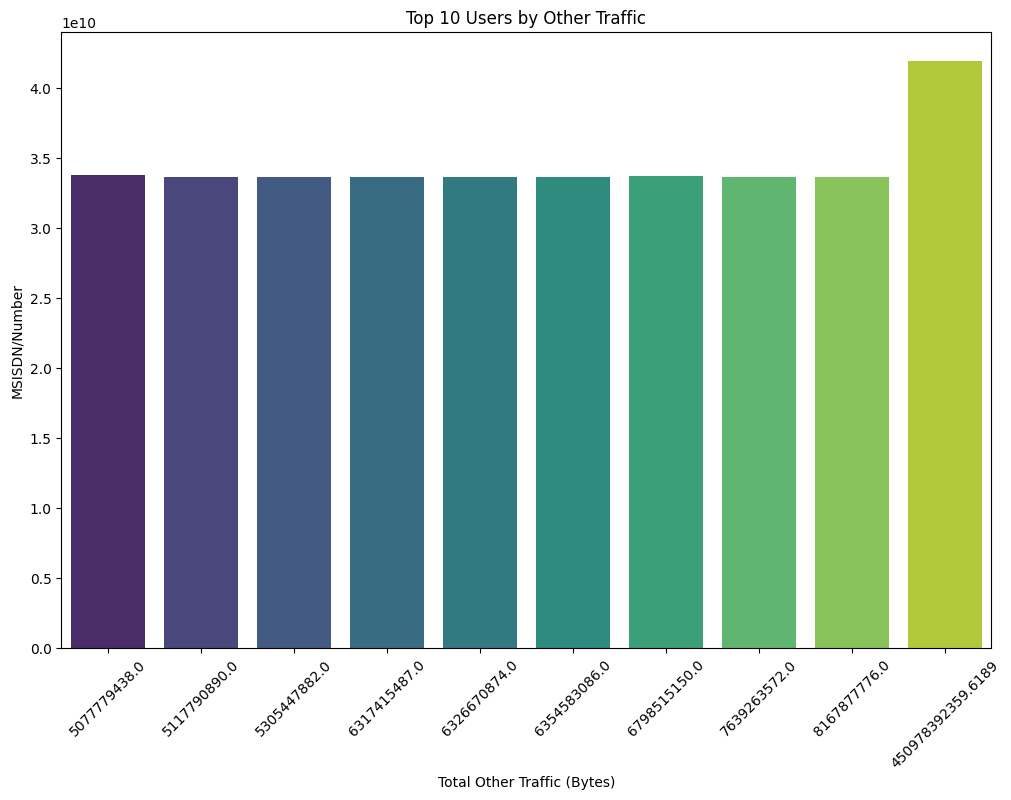

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot( x='Total_Other_Traffic',y='MSISDN/Number', data=top_10_other_user, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Users by Other Traffic')
plt.xlabel('Total Other Traffic (Bytes)')
plt.ylabel('MSISDN/Number')
plt.show()

**Plot the top 3 most used applications using appropriate charts.**

In [ ]:
#Total data consumption by Social Media
Total_data_volume_by_Social_Media = agg_app['Social Media DL (Bytes)'].sum() + agg_app['Social Media UL (Bytes)'].sum()
print("Total_data_volume_by_Social_Media",Total_data_volume_by_Social_Media)

#Total data consumption by Email
Total_data_volume_by_Email = agg_app['Email DL (Bytes)'].sum() + agg_app['Email UL (Bytes)'].sum()
print("Total_data_volume_by_Email",Total_data_volume_by_Email)

#Total data consumption by Youtube
Total_data_volume_by_Youtube = agg_app['Youtube DL (Bytes)'].sum() + agg_app['Youtube UL (Bytes)'].sum()
print("Total_data_volume_by_Youtube",Total_data_volume_by_Youtube)

#Total data consumption by Netfilx
Total_data_volume_by_Netflix = agg_app['Netflix DL (Bytes)'].sum() + agg_app['Netflix UL (Bytes)'].sum()
print("Total_data_volume_by_Netflix",Total_data_volume_by_Netflix)

#Total data consumption by Gaming
Total_data_volume_by_Gaming = agg_app['Gaming DL (Bytes)'].sum() + agg_app['Gaming UL (Bytes)'].sum()
print("Total_data_volume_by_Gaming",Total_data_volume_by_Gaming)

#Total data consumption by Other
Total_data_volume_by_Other = agg_app['Other DL (Bytes)'].sum() + agg_app['Other UL (Bytes)'].sum()
print("Total_data_volume_by_Other",Total_data_volume_by_Other)

#Total data consumption by Google
Total_data_volume_by_Google = agg_app['Google DL (Bytes)'].sum() + agg_app['Google UL (Bytes)'].sum()
print("Total_data_volume_by_Google",Total_data_volume_by_Google)

Total_data_volume_by_Social_Media 274239359454.20804
Total_data_volume_by_Email 338867605596.30994
Total_data_volume_by_Youtube 3396545039272.6387
Total_data_volume_by_Netflix 3394313609363.538
Total_data_volume_by_Gaming 64550395439016.7
Total_data_volume_by_Other 64405230908181.62
Total_data_volume_by_Google 1171101989130.5454


In [ ]:
Total_data_vol_by_each_app = [Total_data_volume_by_Social_Media,Total_data_volume_by_Youtube,
                          Total_data_volume_by_Netflix,Total_data_volume_by_Google,
                          Total_data_volume_by_Email,Total_data_volume_by_Gaming,Total_data_volume_by_Other]

total_data_df = pd.DataFrame({
    'Application': ['Social_Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other'],
    'Total_data_volume_by_each_app': Total_data_vol_by_each_app
})

total_data_df

,Application,Total_data_volume_by_each_app
0,Social_Media,2.742394e+11
1,Youtube,3.396545e+12
2,Netflix,3.394314e+12
3,Google,1.171102e+12
4,Email,3.388676e+11
5,Gaming,6.455040e+13
6,Other,6.440523e+13


<Axes: >

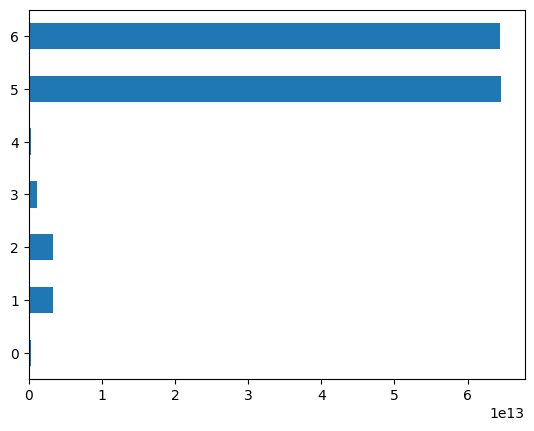

In [ ]:
total_data_df['Total_data_volume_by_each_app'].plot(kind = "barh")

  Application  Total_data_volume_by_each_app
5      Gaming                   6.455040e+13
6       Other                   6.440523e+13
1     Youtube                   3.396545e+12


Text(0.5, 1.0, 'Top 3 Most Used Applications')

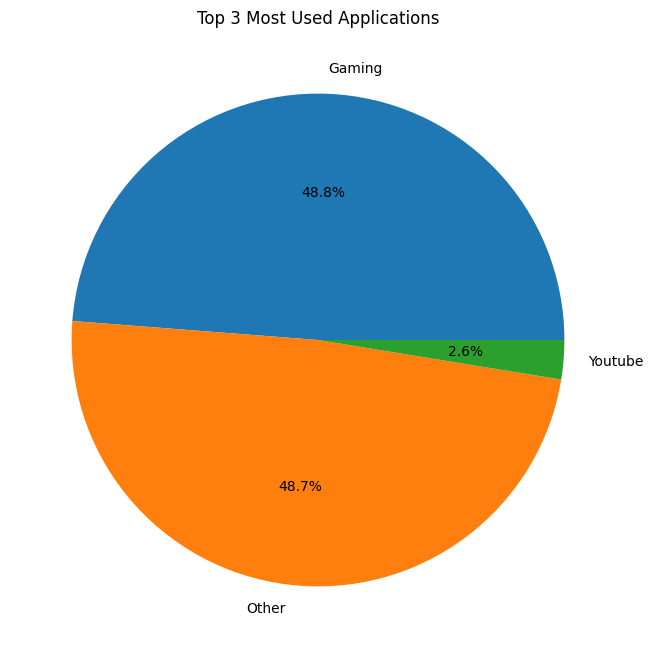

In [ ]:
top_3_most_used_apps = total_data_df.nlargest(3, 'Total_data_volume_by_each_app')
print(top_3_most_used_apps)

plt.figure(figsize=(8, 8))
plt.pie(
    top_3_most_used_apps['Total_data_volume_by_each_app'],
    labels=top_3_most_used_apps['Application'],
    autopct='%1.1f%%',

)
plt.title('Top 3 Most Used Applications')

**Gaming:**

Proportion: The largest segment in the pie chart.
Percentage: Given the total volume of data, Gaming occupies a significant portion of the pie chart, indicating it is the most used application in terms of data volume.

**Other:**

Proportion: The second-largest segment.
Percentage: Slightly less than Gaming, but still a major contributor to the total data volume. This category likely includes various less-dominant applications or services not specified individually.

**Youtube:**

Proportion: The smallest segment among the top 3.
Percentage: Although it has a large volume of data, it is much smaller compared to Gaming and Other, reflecting that while Youtube is a major application, it doesn't consume as much data as the top two



**Gaming:**

Significance: Gaming applications consume a vast majority of the data, highlighting their intensive use. This could be due to high-resolution graphics, frequent updates, and interactive content which require substantial data transfer.

**Other:**

Significance: This category being nearly as large as Gaming suggests that a broad range of applications collectively contribute to a significant amount of data usage. It indicates diverse usage patterns or a combination of many smaller applications.

**Youtube:**

Significance: While significant, Youtube's data volume is lower compared to Gaming and Other. This suggests that although Youtube is popular and uses a considerable amount of data, its data usage is less than the combined impact of Gaming and the various applications in the "Other" category.

**What is the optimized value of k (use the elbow method for this)?  
Interpret your findings**


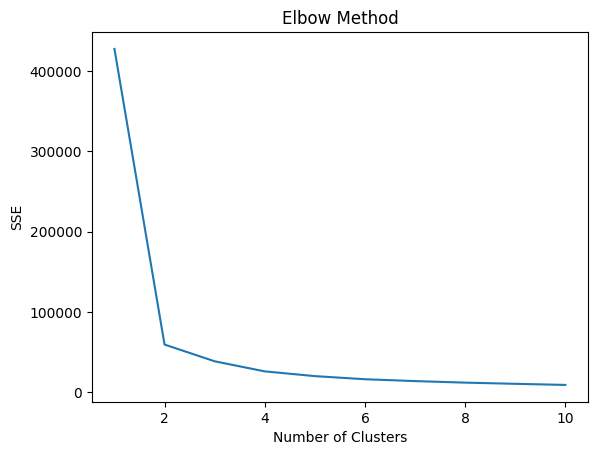

In [ ]:
sse =[]
for k in range(1,11):
  kmeans =KMeans(n_clusters = k )
  kmeans.fit(scaled_data)
  sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

**Interpretation**

Initial Decrease:

At lower values of k, WCSS decreases rapidly. This indicates that as clusters increase, the data points are better grouped, and within-cluster variance decreases.

Elbow Point:

The elbow is where the plot starts to flatten out. This is the point where additional clusters do not significantly reduce WCSS. In our case  the plot starts to level off at k=2, this suggests that 2 clusters might be optimal

Beyond the Elbow:

After the elbow point, further increases in k yield only marginal improvements in WCSS. This is due to the fact that adding more clusters just splits existing clusters into smaller ones rather than providing meaningful insights.

